In [1]:
import warnings
warnings.filterwarnings('ignore')
import torch
import os
from pprint import pprint
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool

from langchain_core.utils.function_calling import convert_to_openai_function
from langchain_openai import ChatOpenAI

from langchain import hub
from langchain.agents import AgentExecutor, create_openai_tools_agent

import tool_pool as tp

dotenv_path = '/Users/minkyuramen/Desktop/project/env'
load_dotenv(dotenv_path)

api_key = os.getenv("SEMANTIC_SCHOLAR_API_KEY")
openai_key = os.getenv("OPENAI_API_KEY")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /Users/minkyuramen/.cache/huggingface/token
Login successful
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /Users/minkyuramen/.cache/huggingface/token
Login successful


In [2]:
# load model
model = ChatOpenAI(model="gpt-3.5-turbo")
# load tool
tools = [tp.loadpaper, tp.recommendpaper, tp.loadfigure]
# load Agent prompt
prompt = hub.pull("hwchase17/openai-tools-agent")

In [3]:
# Choose the LLM that will drive the agent
# Only certain models support this
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Construct the OpenAI Tools agent
agent = create_openai_tools_agent(llm, tools, prompt)
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# loadpaper

In [38]:
# output = agent_executor.invoke({"input": "explain about the math expression about the Filtering api calls in the paper 'ToolFormer : Language Models Can Teach Themselves to Use Tools' 한글로 말해줘"})
output = agent_executor.invoke({"input": "'ToolFormer : Language Models Can Teach Themselves to Use Tools'에서 api calls를 filtering 하는 파트를 수식과 함께 설명해줘. 한글로 대답해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': "'ToolFormer : Language Models Can Teach Themselves to Use Tools'"}`


Here is the title and section of the paper
title
Toolformer: Language Models Can Teach Themselves to Use Tools
sections
          Abstract
  1 Introduction
  2 Approach
        Sampling API Calls
        Executing API Calls
        Filtering API Calls
        Model Finetuning
        Inference
  3 Tools
        Question Answering
        Calculator
        Wikipedia Search
        Machine Translation System
        Calendar
  4 Experiments
    4.1 Experimental Setup
        Dataset Generation
        Model Finetuning
        Baseline Models
    4.2 Downstream Tasks
      4.2.1 LAMA
      4.2.2 Math Datasets
      4.2.3 Question Answering
      4.2.4 Multilingual Question Answering
      4.2.5 Temporal Datasets
    4.3 Language Modeling
    4.4 Scaling Laws
  5 Analysis
        Decoding Strategy
        Data Quality
  6 Related Work
      

In [45]:
pprint(output['output'])

("'Filtering API Calls' 파트에서는 API 호출을 필터링하는 방법에 대해 설명하고 있습니다. 이를 수식과 함께 설명하면 "
 '다음과 같습니다:\n'
 '\n'
 '먼저, API 호출 ci에 대한 위치를 𝑖i로 정의하고, 해당 API의 응답을 ri로 정의합니다. 또한, 가중치 시퀀스 (wi∣i∈ℕ)를 '
 '고려할 때, 다음과 같이 가중 교차 엔트로피 손실을 정의합니다:\n'
 '\n'
 'Li\u200b(𝐳)=−∑j=inwj−i⋅log\u2061pM\u200b(xj∣𝐳,x1:j−1)\n'
 '\n'
 '여기서 Li(𝐳)는 모델 M에 대한 가중 교차 엔트로피 손실을 나타냅니다. 또한, Li+와 Li-는 다음과 같이 정의됩니다:\n'
 '\n'
 'Li+ = Li\u200b(e\u200b(ci,ri))\n'
 'Li- = min\u2061(Li\u200b(ε),Li\u200b(e\u200b(ci,ε))\n'
 '\n'
 '여기서 ε는 빈 시퀀스를 나타냅니다. Li+는 API 호출과 해당 결과를 모델 M에 접두어로 제공했을 때의 손실을 나타내며, Li-는 '
 'API 호출을 하지 않거나 결과를 제공하지 않았을 때의 손실 중 최솟값을 나타냅니다.\n'
 '\n'
 '마지막으로, 필터링 임계값 τf에 대해 다음 조건을 만족하는 API 호출만 유지됩니다:\n'
 '\n'
 'Li--Li+ ≥ τf\n'
 '\n'
 '즉, API 호출과 해당 결과를 제공했을 때의 손실이 API 호출을 하지 않았을 때의 손실보다 적어도 τf만큼 감소해야 해당 API '
 '호출을 유지합니다.')


In [46]:
# output = agent_executor.invoke({"input": "summary the method of the paper 'Large Language Model Connected with Massive APIs' 한글로 말해줘"})
output = agent_executor.invoke({"input": "'Large Language Model Connected with Massive APIs'논문의 method를 요약해 설명해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': "'Large Language Model Connected with Massive APIs'"}`


Here is the title and section of the paper
title
Gorilla: Large Language Model Connected with Massive APIs
sections
          Abstract
  1 Introduction
  2 Related Work
        Large Language Models
        Tool Usage
        LLMs for Program Synthesis
  3 Methodology
    3.1 Dataset Collection
        API Documentation
        Instruction Generation
    3.2 Gorilla
        API Call with Constraints
        Retriever-Aware training
        Gorilla Inference
    3.3 Verifying APIs
        AST Sub-Tree Matching
  4 Evaluation
        Baselines
        Retrievers
    4.1 AST Accuracy on API call
        Finetuning without Retrieval
        Finetuning with Retrieval
        Hallucination with LLM
    4.2 Test-Time Documentation Change
    4.3 API Call with Constraints
  5 Conclusion
  6 Limitations & Social Impacts
  7 Acknowledgement
  References
  8 Appe

In [48]:
pprint(output['output'])

("'Large Language Model Connected with Massive APIs' 논문의 Methodology 섹션은 다음과 "
 '같이 요약됩니다:\n'
 '\n'
 '- **Dataset Collection**: APIBench는 TorchHub, TensorHub 및 HuggingFace API '
 'Model Cards에서 구성된 포괄적인 벤치마크로 구축되었습니다. API 데이터셋 수집 및 명령-응답 쌍 생성 과정을 개요하며, API '
 '문서 및 명령 생성에 대한 세부 내용을 제공합니다.\n'
 '\n'
 '- **API Documentation**: HuggingFace 플랫폼에는 약 203,681개의 모델이 호스팅되어 있습니다. 이 중 '
 '일부는 문서화가 미흡하거나 의존성이 없거나 모델 카드에 정보가 없는 경우가 있습니다. 이를 걸러내기 위해 각 도메인의 상위 20개 모델을 '
 '선택합니다. 이후, Torch Hub, TensorFlow Hub에서도 유사한 작업을 수행하여 총 1,645개의 API 호출을 '
 '얻습니다.\n'
 '\n'
 '- **Instruction Generation**: GPT-4를 활용하여 합성 지시 데이터를 생성합니다. 모델 카드를 JSON 객체로 '
 '변환하여 API 호출에 대한 일반화된 필드를 제공합니다. 이를 통해 API 호출에 대한 지시를 생성하고 API 호출에 대한 학습 데이터를 '
 '확보합니다.\n'
 '\n'
 '- **Gorilla**: Gorilla는 API 호출을 위해 특별히 조정된 LLaMA-7B 모델로, 지시-응답 쌍을 생성하기 위해 '
 'self-instruct를 활용합니다. API 호출에 대한 제약 조건과 함께 API 호출을 처리하는 데 필요한 추가적인 복잡성을 '
 '소개합니다.\n'
 '\n'
 '- **API Call with Constraints**: API 호출은 종종 내재적인 제약 조건을 가지고 있습니다. 이러한 제약 조건은 '
 'LLM이 API 호출의 기능

# recompendpaper

In [31]:
output = agent_executor.invoke({"input": "'Facilitating Large Language Models to Master 16000+ Real-world APIs' 논문 읽기 전에 읽기 좋은 논문 추천해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'Facilitating Large Language Models to Master 16000+ Real-world APIs', 'type': 'reference'}`


([{'paperId': '0bfc804e31eecfd77f45e4ee7f4d629fffdcd628', 'title': 'ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world APIs', 'abstract': 'Despite the advancements of open-source large language models (LLMs), e.g., LLaMA, they remain significantly limited in tool-use capabilities, i.e., using external tools (APIs) to fulfill human instructions. The reason is that current instruction tuning largely focuses on basic language tasks but ignores the tool-use domain. This is in contrast to the excellent tool-use capabilities of state-of-the-art (SOTA) closed-source LLMs, e.g., ChatGPT. To bridge this gap, we introduce ToolLLM, a general tool-use framework encompassing data construction, model training, and evaluation. We first present ToolBench, an instruction-tuning dataset for tool use, which 

In [32]:
pprint(output['output'])

('여기 몇 가지 읽기 좋은 논문 추천이 있습니다:\n'
 '\n'
 '1. **ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world '
 'APIs**\n'
 '   - **요약**: 이 논문은 대규모 언어 모델이 실제 API를 습득하는 데 도움을 주는 ToolLLM을 소개합니다. ToolLLM은 '
 '데이터 구축, 모델 훈련 및 평가를 포함하는 일반적인 도구 사용 프레임워크입니다.\n'
 '   - **발행일**: 미상\n'
 '\n'
 '2. **Generative agent-based modeling with actions grounded in physical, '
 'social, or digital space using Concordia**\n'
 '   - **요약**: 본 연구는 Concordia를 소개하여 신체적, 사회적 또는 디지털 공간에 근거한 행동을 하는 생성적 에이전트 '
 '기반 모델링을 용이하게 합니다.\n'
 '   - **발행일**: 미상\n'
 '\n'
 '3. **ReAct: Synergizing Reasoning and Acting in Language Models**\n'
 '   - **요약**: 이 논문은 LLMs가 추론과 행동을 통합하여 작업을 수행하는 방법을 탐구하며, ReAct라는 방법을 소개합니다.\n'
 '   - **발행일**: 2022년 10월 6일\n'
 '\n'
 '4. **Self-Instruct: Aligning Language Models with Self-Generated '
 'Instructions**\n'
 '   - **요약**: Self-Instruct는 사전 훈련된 언어 모델의 지시 따르기 능력을 향상시키기 위한 프레임워크로, 자체 생성된 '
 '지시와 일치시킴으로써 모델을 세밀하게 조정합니다.\n'
 '   - **발행일**: 2022년 12월 20일\n'
 '\n'
 '5. **Toolformer: Lang

In [34]:
output = agent_executor.invoke({"input": "'Facilitating Large Language Models to Master 16000+ Real-world APIs' 논문 읽어봤는데 좋은거 같아. 다음에 읽을 비슷한 논문 추천해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'Facilitating Large Language Models to Master 16000+ Real-world APIs', 'type': 'citation'}`


[{'paperId': '19c222d1f18317d58cc85491f37479bc0dc49f41', 'title': 'API-Bank: A Comprehensive Benchmark for Tool-Augmented LLMs', 'abstract': "Recent research has demonstrated that Large Language Models (LLMs) can enhance their capabilities by utilizing external tools. However, three pivotal questions remain unanswered: (1) How effective are current LLMs in utilizing tools? (2) How can we enhance LLMs' ability to utilize tools? (3) What obstacles need to be overcome to leverage tools? To address these questions, we introduce API-Bank, a groundbreaking benchmark, specifically designed for tool-augmented LLMs. For the first question, we develop a runnable evaluation system consisting of 73 API tools. We annotate 314 tool-use dialogues with 753 API calls to assess the existing LLMs' capabilities in planning, retrie

In [35]:
pprint(output['output'])

('다음에 읽을 논문으로 추천해드릴 수 있는 몇 가지 옵션이 있습니다:\n'
 '\n'
 '1. **API-Bank: A Comprehensive Benchmark for Tool-Augmented LLMs**\n'
 '   - 발행일: 2023년 4월 14일\n'
 '   - 인용 횟수: 8회\n'
 '   - 초록: 최근 연구에서 대형 언어 모델(Large Language Models, LLMs)이 외부 도구를 활용하여 능력을 향상시킬 '
 '수 있다는 것을 입증했습니다. 이 논문은 API-Bank를 소개하며, 이는 LLMs에게 특히 설계된 도구-보조 LLMs를 위한 혁신적인 '
 '벤치마크입니다.\n'
 '\n'
 '2. **ToolAlpaca: Generalized Tool Learning for Language Models with 3000 '
 'Simulated Cases**\n'
 '   - 발행일: 2023년 6월 8일\n'
 '   - 인용 횟수: 15회\n'
 '   - 초록: 이 논문은 ToolAlpaca를 소개하며, 이는 소형 언어 모델에서 일반화된 도구 사용 능력을 학습하는 혁신적인 '
 '프레임워크입니다.\n'
 '\n'
 '3. **MINT: Evaluating LLMs in Multi-turn Interaction with Tools and Language '
 'Feedback**\n'
 '   - 발행일: 2023년 9월 19일\n'
 '   - 인용 횟수: 7회\n'
 '   - 초록: 본 논문은 MINT를 소개하며, 이는 LLMs의 다중 턴 상호작용 능력을 평가하는 벤치마크입니다.\n'
 '\n'
 '4. **FireAct: Toward Language Agent Fine-tuning**\n'
 '   - 발행일: 2023년 10월 9일\n'
 '   - 인용 횟수: 7회\n'
 '   - 초록: 이 논문은 LMs를 세밀하게 조정하여 언어 에이전트를 얻는 방향에 대해 조사하고 주장합니다.\n'
 '\n'
 '5. **ADa

# loadfigure



> Entering new AgentExecutor chain...

Invoking: `loadfigure` with `{'query': 'StableToolBench', 'instruction': 'Pass Rate evaluation', 'start_page': 1}`


### Searched Paper ###
Title: StableToolBench: Towards Stable Large-Scale Benchmarking on Tool Learning of Large Language Models
Authors: ['Zhicheng Guo', 'Sijie Cheng', 'Hao Wang', 'Shihao Liang', 'Yujia Qin', 'Peng Li', 'Zhiyuan Liu', 'Maosong Sun', 'Yang Liu']
Published: 2024-03-12
{'paperId': '66eae99f971b8dc3b3fd83e335848d9c95594bb5', 'externalIds': {'DBLP': 'journals/corr/abs-2403-07714', 'ArXiv': '2403.07714', 'DOI': '10.48550/arXiv.2403.07714', 'CorpusId': 268363691}}
ArXiv_id: 2403.07714
File ./papers_db/2403.07714.pdf already exists. Skipping download.
Page limit reached at 6
Source files downloaded to: ./papers_db/2403.07714/2403.07714.tar.gz
./papers_db/2403.07714/figs/pass_rate.pdf


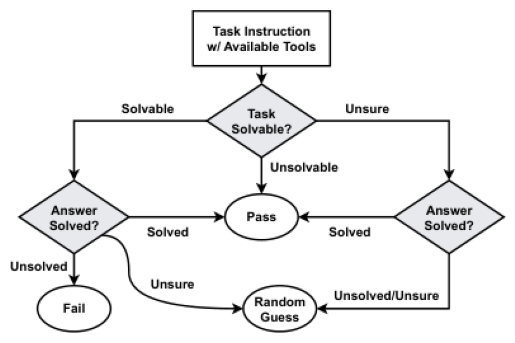

StableToolBench: Towards Stable Large-Scale Benchmarking on Tool Learning of Large Language Models Zhicheng Guo1,2, Sijie Cheng1,2,3, Hao Wang4, Shihao Liang5, Yujia Qin1, Peng Li2,Zhiyuan Liu1,Maosong Sun1,Yang Liu1,2,6 1Dept. of Comp. Sci. & Tech., Institute for AI, Tsinghua University, Beijing, China 2Institute for AI Industry Research (AIR), Tsinghua University, Beijing, China 301.AI4Google5The University of Hong Kong 6Jiangsu Collaborative Innovation Center for Language Competence, Jiangsu, China {guo-zc21 ,csj23 }@mails.tsinghua.edu.cn Abstract Large Language Models (LLMs) have wit- nessed remarkable advancements in recent years, prompting the exploration of tool learn- ing, which integrates LLMs with external tools to address diverse real-world challenges. As- sessing the capability of LLMs to utilise tools necessitates large-scale and stable benchmarks. However, previous works relied on either hand- crafted online tools with limited scale, or large- scale real online APIs suffe

In [4]:
# output = agent_executor.invoke({"input": "explain about the 'Figure 2: Pass Rate evaluation in ToolBench paper.' in the 3 page of the paper 'StableToolBench' 한글로 말해줘"})
output = agent_executor.invoke({"input": "'StableToolBench'의 Pass Rate evaluation 부분을 그림과 함께 설명해줘"})

In [5]:
pprint(output['output'])

('The Pass Rate evaluation in the paper "StableToolBench" is explained with '
 'the help of a figure. \n'
 '\n'
 'The Pass Rate evaluation process involves judging solvable tasks and '
 'evaluating them with two metrics: Solvable Pass Rate (SoPR) and Solvable Win '
 'Rate (SoWR). The figure illustrates the process of evaluating solvable tasks '
 'with tools and answers, where tasks are categorized as solvable, unsolvable, '
 'or unsure. The evaluation is done using models like Gemini Pro, GPT-4 Turbo, '
 'and Claude 2 to determine the solvability of tasks. \n'
 '\n'
 'The SoPR metric assesses the pass rate of solvable tasks, where answers are '
 'categorized as Solved, Unsolved, or Unsure, contributing scores of 1, 0.5, '
 'and 0 respectively. The SoWR metric determines the win rate based on the '
 'outcomes of solved and unsolved tasks, with the solved task winning in case '
 'of a tie.\n'
 '\n'
 'This evaluation process ensures stability and reliability in benchmarking '
 'tool learn

In [6]:
output = agent_executor.invoke({"input": "'StableToolBench' 논문의 SoPR evaluation과 'ToolBench' 논문에서 소개되는 Pass Rate evaluation을 그림이 있다면 보여주면서 비교해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadfigure` with `{'query': 'StableToolBench', 'instruction': 'SoPR evaluation', 'start_page': 1}`


### Searched Paper ###
Title: StableToolBench: Towards Stable Large-Scale Benchmarking on Tool Learning of Large Language Models
Authors: ['Zhicheng Guo', 'Sijie Cheng', 'Hao Wang', 'Shihao Liang', 'Yujia Qin', 'Peng Li', 'Zhiyuan Liu', 'Maosong Sun', 'Yang Liu']
Published: 2024-03-12
{'paperId': '66eae99f971b8dc3b3fd83e335848d9c95594bb5', 'externalIds': {'DBLP': 'journals/corr/abs-2403-07714', 'ArXiv': '2403.07714', 'DOI': '10.48550/arXiv.2403.07714', 'CorpusId': 268363691}}
ArXiv_id: 2403.07714
File ./papers_db/2403.07714.pdf already exists. Skipping download.
Page limit reached at 6
Source files downloaded to: ./papers_db/2403.07714/2403.07714.tar.gz


KeyError: 'sopr'